# Práctica: Lematización para Mejora de Análisis de Sentimiento en Reseñas Multilingües
**Contexto:** Eres parte del equipo de NLP de **GlobalFeedback**, una empresa que analiza reseñas de productos en español, inglés y francés para identificar defectos críticos. El modelo actual confunde 'no funcionó' y 'funciona mal' como conceptos distintos por falta de normalización léxica.

## Fase 1: Diagnóstico de Problemas
**Objetivo:** Identificar palabras no lematizadas que causan ruido en el análisis.

In [3]:
# Importar librerías necesarias
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud
import spacy
import matplotlib.pyplot as plt

In [5]:
# Cargar el dataset
df = pd.read_csv('reviews_multilang.csv')
print(df.head())

                                               texto idioma sentimiento
0  La interfaz intuitiva facilita la navegación i...     es    positivo
1  El rendimiento gráfico dejó mucho que desear e...     es    negativo
2  Constantes fallos de conectividad WiFi tras la...     es    negativo
3  Sorprendido por la autonomía de la batería en ...     es    positivo
4  El sistema operativo se bloquea recurrentement...     es    negativo


In [6]:
# Generar un análisis exploratorio inicial
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['texto'])
print(vectorizer.get_feature_names_out())

['000' '12' '15' '40' '45' '50' '5g' '98' 'accesorios' 'actualizaciones'
 'actualización' 'adecuadamente' 'adicionales' 'agua' 'ajusta' 'al'
 'altavoz' 'ambiental' 'ambientes' 'anti' 'anunciadas' 'apenas'
 'aplicaciones' 'apps' 'asistente' 'atmos' 'auditiva' 'aumentada'
 'autenticación' 'automática' 'automático' 'autonomía' 'baja' 'bajo'
 'batería' 'biométrica' 'bisagra' 'bloatware' 'bloquea' 'bluetooth'
 'burocrático' 'cad' 'calidad' 'cansancio' 'carga' 'categoría' 'ciclos'
 'clics' 'colores' 'comandos' 'compatibilidad' 'complejos' 'componentes'
 'con' 'conectividad' 'conexión' 'conferencias' 'consistente' 'constantes'
 'construcción' 'consume' 'consumo' 'controladores' 'corrección' 'crea'
 'cubierta' 'cámara' 'de' 'dedo' 'deficiente' 'dejó' 'demora' 'desear'
 'desinstalar' 'desproporcionada' 'detalles' 'devolución' 'dialectos'
 'difícil' 'diseño' 'distancia' 'distorsiona' 'dolby' 'dos' 'durante'
 'eficazmente' 'eficientemente' 'ejecutar' 'el' 'elevado' 'en' 'energía'
 'engorroso' 'en

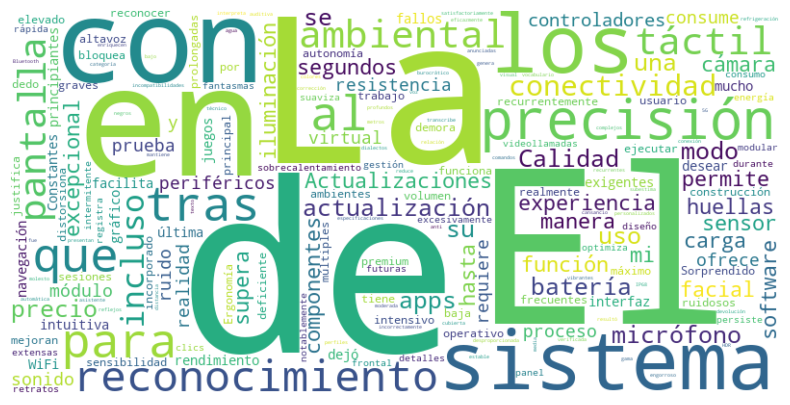

In [7]:
# Visualizar palabras más frecuentes con una nube de palabras
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(df['texto']))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## Fase 2: Implementación del Lematizador
**Objetivo:** Crear una función que lematice texto según su idioma y categoría gramatical.

In [8]:
# Función para lematizar texto
def lematizar(texto, idioma):
    if idioma == 'es':
        nlp = spacy.load('es_core_news_sm')
    elif idioma == 'en':
        nlp = spacy.load('en_core_web_sm')
    else:
        raise ValueError('Idioma no soportado')
    doc = nlp(texto)
    return [token.lemma_ for token in doc if not token.is_stop]

# Ejemplo de uso
texto_ejemplo = 'Los dispositivos fallaron constantemente, no funcionan bien.'
print(lematizar(texto_ejemplo, 'es'))

['dispositivo', 'fallar', 'constantemente', ',', 'funcionar', '.']


## Fase 3: Optimización y Validación
**Objetivo:** Ajustar el lematizador para manejar jerga técnica y evaluar su impacto.

In [9]:
# Evaluar impacto de la lematización en el modelo
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

# Preprocesar datos
df['lematizado'] = df.apply(lambda row: ' '.join(lematizar(row['texto'], row['idioma'])), axis=1)
X_train, X_test, y_train, y_test = train_test_split(df['lematizado'], df['sentimiento'], test_size=0.2, random_state=42)

# Entrenar modelo
vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)
model = RandomForestClassifier()
model.fit(X_train_vec, y_train)

# Evaluar modelo
y_pred = model.predict(X_test_vec)
print('F1-score:', f1_score(y_test, y_pred, average='weighted'))

F1-score: 0.64
